In [6]:
%matplotlib inline
import scipy as sp
import os
import matplotlib.pyplot as plt
import seaborn

#モデルのあてはめ
def error(f,x,y):
	return sp.sum((f(x)-y)**2)

data = sp.genfromtxt(os.path.expanduser("~/Python_src/src/MachineLearningSystem/exdata/ch01/data/web_traffic.tsv"))

print(data.shape)

print(data[:10])
x = data[:,0]
y = data[:,1]

#NAN値の処理

x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

(743, 2)
[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00   1.65600000e+03]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]


319874314.777
Model parameters:  [    2.57152281  1002.10684085]
Model Parameters :  [  1.04688184e-02  -5.21727812e+00   1.96921629e+03]


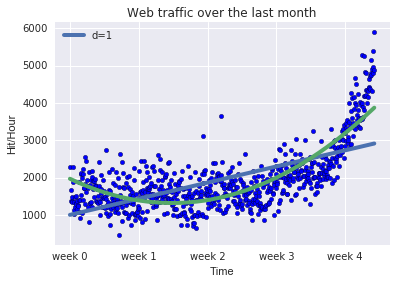

In [16]:
plt.scatter(x,y)


#fp1=切片と変数,residuals=残差 , full指定で残差等を取得可能, 1は次数を示す
fp1,residuals,rank,s,rcond = sp.polyfit(x,y,1,full=True)
f1 = sp.poly1d(fp1) #モデルパラメータからモデル関数の作成f1(x)= ~

print(error(f1,x,y))

print("Model parameters:  %s"  % fp1)

#Pyplotの設定
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hit/Hour")
plt.xticks([w*7*24 for w in range(10)],
    ["week %i" %w for w in range(10)])
fx = sp.linspace(0,x[-1],1000)
plt.plot(fx,f1(fx),linewidth=4)
plt.legend(["d=%i" % f1.order],loc="upper left") #凡例
plt.autoscale(tight=True)
plt.grid()


#多項式のあてはめ
f2p = sp.polyfit(x,y,2)
f2 = sp.poly1d(f2p)
print("Model Parameters :  %s" % f2p)

plt.plot(fx,f2(fx),linewidth=4)
plt.legend(["d=%i" % f1.order],loc="upper left")
plt.autoscale(tight=True)
plt.grid()

plt.show()


### P20 データを違う視点から眺める

In [ ]:
inflectoin = 3.5 * 7 * 24
#Week3以前
xa = x[:inflection]
ya = x[:inflection]
#Week3以後
xb = x[inflection:]
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa,ya,1))